# Railvision project

*Note:*
- pakai runtime type T4 GPU
- copas sebelum revisi/edit panjang

*Source:*
*link*

Link1: https://www.kaggle.com/datasets/tthien/shanghaitech

Link2: https://www.kaggle.com/datasets/hoangxuanviet/jhu-crowd

**Target kerja:**
- Cari dataset, utamakan ada bounding box
- Tentuin model yg efisien buat keramaian

## Library

In [1]:
!pip install ultralytics
!pip install opencv-python numpy matplotlib pandas pyyaml
!pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 113.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [2]:
# Library Umum
import os
import shutil
import zipfile
import random
from glob import glob
from pathlib import Path # Opsional, tapi seringkali lebih rapi
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Numerik & Data
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split # Jika Anda akan membagi dataset untuk training

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline

# Pemrosesan Gambar
from scipy.io import loadmat
import cv2
from PIL import Image

# Ultralytics (YOLOv8) - Ini yang utama!
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## Data Exploration

In [3]:
from ultralytics import YOLO

# Load a pretrained YOLOv8n model (nano, lightweight)
model = YOLO('yolov8m.pt')

100%|██████████| 49.7M/49.7M [00:00<00:00, 326MB/s]


In [4]:
# Import module kebutuhan upload file dan upload file kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"wahyuwidihansyah","key":"8f5f45cd2b659efbdc8d732d310d3ed8"}'}

In [5]:
# Download dataset dari kaggle lalu di unzip
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d tthien/shanghaitech
!unzip shanghaitech.zip

Dataset URL: https://www.kaggle.com/datasets/tthien/shanghaitech
License(s): unknown
 93% 309M/333M [00:00<00:00, 520MB/s]
100% 333M/333M [00:00<00:00, 521MB/s]
Archive:  shanghaitech.zip
  inflating: ShanghaiTech/part_A/test_data/ground-truth/GT_IMG_1.mat  
  inflating: ShanghaiTech/part_A/test_data/ground-truth/GT_IMG_10.mat  
  inflating: ShanghaiTech/part_A/test_data/ground-truth/GT_IMG_100.mat  
  inflating: ShanghaiTech/part_A/test_data/ground-truth/GT_IMG_101.mat  
  inflating: ShanghaiTech/part_A/test_data/ground-truth/GT_IMG_102.mat  
  inflating: ShanghaiTech/part_A/test_data/ground-truth/GT_IMG_103.mat  
  inflating: ShanghaiTech/part_A/test_data/ground-truth/GT_IMG_104.mat  
  inflating: ShanghaiTech/part_A/test_data/ground-truth/GT_IMG_105.mat  
  inflating: ShanghaiTech/part_A/test_data/ground-truth/GT_IMG_106.mat  
  inflating: ShanghaiTech/part_A/test_data/ground-truth/GT_IMG_107.mat  
  inflating: ShanghaiTech/part_A/test_data/ground-truth/GT_IMG_108.mat  
  inflating:

## Preprocessing

In [7]:
import yaml

# ====== Konfigurasi Dataset ======
BASE_DIR = "/content/ShanghaiTech"
PARTS = ["part_A", "part_B"]
IMAGE_DIRS = []
GT_DIRS = []

for part in PARTS:
    for split in ["train_data", "test_data"]:
        IMAGE_DIRS.append(f"{BASE_DIR}/{part}/{split}/images")
        GT_DIRS.append(f"{BASE_DIR}/{part}/{split}/ground-truth")

image_paths = sorted(sum([glob(d + "/*.jpg") for d in IMAGE_DIRS], []))
gt_paths = sorted(sum([glob(d + "/*.mat") for d in GT_DIRS], []))

print(f"Total gambar ditemukan: {len(image_paths)}")
print(f"Total ground truth ditemukan: {len(gt_paths)}")

# ====== Setup Direktori Output ======
BASE_OUT = "/content/yolo_dataset"
IMG_OUT = os.path.join(BASE_OUT, "images")
LBL_OUT = os.path.join(BASE_OUT, "labels")
os.makedirs(IMG_OUT + "/train", exist_ok=True)
os.makedirs(IMG_OUT + "/val", exist_ok=True)
os.makedirs(LBL_OUT + "/train", exist_ok=True)
os.makedirs(LBL_OUT + "/val", exist_ok=True)

# ====== Split Dataset Train/Val ======
combined = list(zip(image_paths, gt_paths))
random.seed(42)
random.shuffle(combined)
split_idx = int(0.9 * len(combined))
train_set = combined[:split_idx]
val_set = combined[split_idx:]

# ====== Fungsi Konversi Titik ke YOLO Format ======
def convert_to_yolo_format(img_w, img_h, x, y, box_w=40, box_h=80):
    x_center = x / img_w
    y_center = y / img_h
    w = box_w / img_w
    h = box_h / img_h
    return 0, x_center, y_center, w, h  # class_id = 0 (orang)

# ====== Proses Dataset ======
def process_dataset(dataset, mode):
    for img_path, gt_path in tqdm(dataset, desc=f"Processing {mode}", total=len(dataset)):
        img = cv2.imread(img_path)
        if img is None:
            print(f"Image not found: {img_path}")
            continue
        h, w = img.shape[:2]
        filename = os.path.basename(img_path)
        name = os.path.splitext(filename)[0]

        # Salin gambar
        out_img_path = f"{IMG_OUT}/{mode}/{filename}"
        cv2.imwrite(out_img_path, img)

        # Baca ground-truth
        mat = loadmat(gt_path)
        points = mat['image_info'][0,0][0,0][0]

        # Simpan file label
        out_label_path = f"{LBL_OUT}/{mode}/{name}.txt"
        with open(out_label_path, "w") as f:
            for pt in points:
                x, y = pt[0], pt[1]
                class_id, x_c, y_c, bw, bh = convert_to_yolo_format(w, h, x, y)
                f.write(f"{class_id} {x_c:.6f} {y_c:.6f} {bw:.6f} {bh:.6f}\n")

# Jalankan proses
process_dataset(train_set, "train")
process_dataset(val_set, "val")

# ====== Buat data.yaml ======
yaml_data = {
    'train': f"{BASE_OUT}/images/train",
    'val': f"{BASE_OUT}/images/val",
    'nc': 1,
    'names': ['person']
}

with open(f"{BASE_OUT}/data.yaml", "w") as f:
    yaml.dump(yaml_data, f)

print("✅ Dataset selesai diproses dan data.yaml berhasil dibuat.")


Total gambar ditemukan: 1198
Total ground truth ditemukan: 1198


Processing train:   0%|          | 0/1078 [00:00<?, ?it/s]

Processing val:   0%|          | 0/120 [00:00<?, ?it/s]

✅ Dataset selesai diproses dan data.yaml berhasil dibuat.


## Model Training & Evaluation
(model dibawah masih tentativ)

### Model Yolo v8

In [8]:
from ultralytics import YOLO

# Inisialisasi model dari pretrained weight
model = YOLO('yolov8m.pt')  # Bisa diganti dengan yolov8s.pt, yolov8m.pt, atau yolov8l.pt

# Training model dengan early stopping
model.train(
    data='/content/yolo_dataset/data.yaml',  # Path ke data.yaml
    epochs=50,                                # Maksimal epoch
    imgsz=728,                                # Ukuran input image
    batch=2,                                  # Ukuran batch
    name='yolov8-shanghaitech',               # Nama folder output training
    device=0,                                 # Gunakan GPU (0) jika tersedia
    cache=True,                               # Cache dataset ke RAM
    augment=True,                             # Aktifkan augmentasi data
    patience=5                                # Early stopping: stop jika tidak ada peningkatan mAP50 selama 5 epoch
)


Ultralytics 8.3.154 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=2, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/yolo_dataset/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=728, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8-shanghaitech, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=5, perspective=0.0, plots=True, pose=12.0, p

100%|██████████| 755k/755k [00:00<00:00, 33.7MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

 19                  -1  1   1327872  ultralytics.nn.modules.conv.Conv             [384, 384, 3, 2]              
 20             [-1, 9]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 21                  -1  2   4207104  ultralytics.nn.modules.block.C2f             [960, 576, 2]                 
 22        [15, 18, 21]  1   3776275  ultralytics.nn.modules.head.Detect           [1, [192, 384, 576]]          
Model summary: 169 layers, 25,856,899 parameters, 25,856,883 gradients, 79.1 GFLOPs

Transferred 469/475 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 116MB/s]


AMP: checks passed ✅
WARNING ⚠️ imgsz=[728] must be multiple of max stride 32, updating to [736]
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2072.9±1329.3 MB/s, size: 305.2 KB)


train: Scanning /content/yolo_dataset/labels/train... 393 images, 0 backgrounds, 0 corrupt: 100%|██████████| 393/393 [00:00<00:00, 1092.21it/s]

train: /content/yolo_dataset/images/train/IMG_109.jpg: 12 duplicate labels removed
train: /content/yolo_dataset/images/train/IMG_137.jpg: 1 duplicate labels removed
train: /content/yolo_dataset/images/train/IMG_183.jpg: 8 duplicate labels removed
train: /content/yolo_dataset/images/train/IMG_195.jpg: 1 duplicate labels removed
train: /content/yolo_dataset/images/train/IMG_208.jpg: 1 duplicate labels removed
train: /content/yolo_dataset/images/train/IMG_219.jpg: 1 duplicate labels removed
train: /content/yolo_dataset/images/train/IMG_226.jpg: 1 duplicate labels removed
train: /content/yolo_dataset/images/train/IMG_263.jpg: 2 duplicate labels removed
train: /content/yolo_dataset/images/train/IMG_285.jpg: 1 duplicate labels removed
train: /content/yolo_dataset/images/train/IMG_33.jpg: 1 duplicate labels removed
train: /content/yolo_dataset/images/train/IMG_349.jpg: 3 duplicate labels removed
train: /content/yolo_dataset/images/train/IMG_370.jpg: 4 duplicate labels removed
train: /content/

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.4GB RAM): 100%|██████████| 393/393 [00:02<00:00, 150.34it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 414.5±229.6 MB/s, size: 232.3 KB)


val: Scanning /content/yolo_dataset/labels/val... 107 images, 0 backgrounds, 0 corrupt: 100%|██████████| 107/107 [00:00<00:00, 442.26it/s]

val: /content/yolo_dataset/images/val/IMG_116.jpg: 1 duplicate labels removed
val: /content/yolo_dataset/images/val/IMG_226.jpg: 1 duplicate labels removed
val: /content/yolo_dataset/images/val/IMG_229.jpg: 2 duplicate labels removed
val: /content/yolo_dataset/images/val/IMG_374.jpg: 1 duplicate labels removed
val: /content/yolo_dataset/images/val/IMG_55.jpg: 1 duplicate labels removed
val: /content/yolo_dataset/images/val/IMG_61.jpg: 1 duplicate labels removed
val: /content/yolo_dataset/images/val/IMG_90.jpg: 4 duplicate labels removed
val: /content/yolo_dataset/images/val/IMG_99.jpg: 5 duplicate labels removed
val: New cache created: /content/yolo_dataset/labels/val.cache


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.1GB RAM): 100%|██████████| 107/107 [00:00<00:00, 153.63it/s]


Plotting labels to runs/detect/yolov8-shanghaitech/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 736 train, 736 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8-shanghaitech
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      5.12G      2.592      1.705      1.942        172        736: 100%|██████████| 197/197 [00:31<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.95it/s]

                   all        107      31773      0.255      0.246      0.157     0.0621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      7.35G       2.17      1.519       1.66        377        736: 100%|██████████| 197/197 [00:29<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:03<00:00,  8.52it/s]

                   all        107      31773      0.356      0.273      0.212      0.084



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      7.42G      2.092      1.397      1.629        141        736: 100%|██████████| 197/197 [00:28<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:03<00:00,  7.49it/s]

                   all        107      31773      0.499      0.359      0.346      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50       5.3G      2.138      1.431      1.614         35        736: 100%|██████████| 197/197 [00:29<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:03<00:00,  8.40it/s]

                   all        107      31773      0.308      0.214      0.206     0.0787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      5.37G      2.052      1.425      1.565        290        736: 100%|██████████| 197/197 [00:29<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:03<00:00,  8.34it/s]

                   all        107      31773      0.479      0.335      0.342      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      5.43G      1.997      1.357      1.531        147        736: 100%|██████████| 197/197 [00:29<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:03<00:00,  8.19it/s]

                   all        107      31773       0.41      0.327      0.278      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50       5.5G      1.996      1.346      1.519        221        736: 100%|██████████| 197/197 [00:28<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:03<00:00,  8.29it/s]

                   all        107      31773      0.315      0.264      0.191      0.067



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      5.57G      1.918      1.256      1.471       1067        736: 100%|██████████| 197/197 [00:29<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:03<00:00,  8.56it/s]

                   all        107      31773      0.313      0.263      0.195     0.0574
EarlyStopping: Training stopped early as no improvement observed in last 5 epochs. Best results observed at epoch 3, best model saved as best.pt.
To update EarlyStopping(patience=5) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



8 epochs completed in 0.075 hours.
Optimizer stripped from runs/detect/yolov8-shanghaitech/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/yolov8-shanghaitech/weights/best.pt, 52.0MB

Validating runs/detect/yolov8-shanghaitech/weights/best.pt...
Ultralytics 8.3.154 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:16<00:00,  1.60it/s]


                   all        107      31773      0.435      0.345      0.308      0.139
Speed: 0.5ms preprocess, 95.3ms inference, 0.0ms loss, 15.0ms postprocess per image
Results saved to runs/detect/yolov8-shanghaitech


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d32e40a6510>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

## Evaluasi Model

In [9]:
from ultralytics import YOLO

# Path ke model hasil training terbaik
model_path = '/content/runs/detect/yolov8-shanghaitech/weights/best.pt'

# Load model
model = YOLO(model_path)

# Evaluasi model pada dataset validasi
results = model.val(
    data='/content/yolo_dataset/data.yaml',  # Path ke file data.yaml
    imgsz=728,
    batch=2,
    device=0  # Gunakan GPU jika tersedia
)

# Ambil metrik evaluasi
mp = results.box.mp  # Mean Precision
mr = results.box.mr  # Mean Recall
map50 = results.box.map50  # mAP@0.5
map5095 = results.box.map  # mAP@0.5:0.95

# Tampilkan hasil evaluasi
print("\n📊 Evaluation Metrics:")
print(f"Mean Precision (mp) : {mp:.4f}")
print(f"Mean Recall (mr)    : {mr:.4f}")
print(f"mAP@0.5             : {map50:.4f}")
print(f"mAP@0.5:0.95        : {map5095:.4f}")

WARNING ⚠️ imgsz=[728] must be multiple of max stride 32, updating to [736]
Ultralytics 8.3.154 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2759.4±880.4 MB/s, size: 280.7 KB)


val: Scanning /content/yolo_dataset/labels/val.cache... 107 images, 0 backgrounds, 0 corrupt: 100%|██████████| 107/107 [00:00<?, ?it/s]

val: /content/yolo_dataset/images/val/IMG_116.jpg: 1 duplicate labels removed
val: /content/yolo_dataset/images/val/IMG_226.jpg: 1 duplicate labels removed
val: /content/yolo_dataset/images/val/IMG_229.jpg: 2 duplicate labels removed
val: /content/yolo_dataset/images/val/IMG_374.jpg: 1 duplicate labels removed
val: /content/yolo_dataset/images/val/IMG_55.jpg: 1 duplicate labels removed
val: /content/yolo_dataset/images/val/IMG_61.jpg: 1 duplicate labels removed
val: /content/yolo_dataset/images/val/IMG_90.jpg: 4 duplicate labels removed
val: /content/yolo_dataset/images/val/IMG_99.jpg: 5 duplicate labels removed



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  5.26it/s]


                   all        107      31773      0.501       0.36      0.348       0.16
Speed: 0.4ms preprocess, 50.6ms inference, 0.0ms loss, 8.7ms postprocess per image
Results saved to runs/detect/val

📊 Evaluation Metrics:
Mean Precision (mp) : 0.5007
Mean Recall (mr)    : 0.3598
mAP@0.5             : 0.3480
mAP@0.5:0.95        : 0.1596


## Conclusion

### Inference


image 1/1 /content/yolo_dataset/images/val/IMG_102.jpg: 576x736 284 persons, 43.4ms
Speed: 5.7ms preprocess, 43.4ms inference, 175.4ms postprocess per image at shape (1, 3, 576, 736)

🖼️ Gambar: /content/yolo_dataset/images/val/IMG_102.jpg
👥 Jumlah manusia terdeteksi: 284
📌 Klasifikasi keramaian: Padat


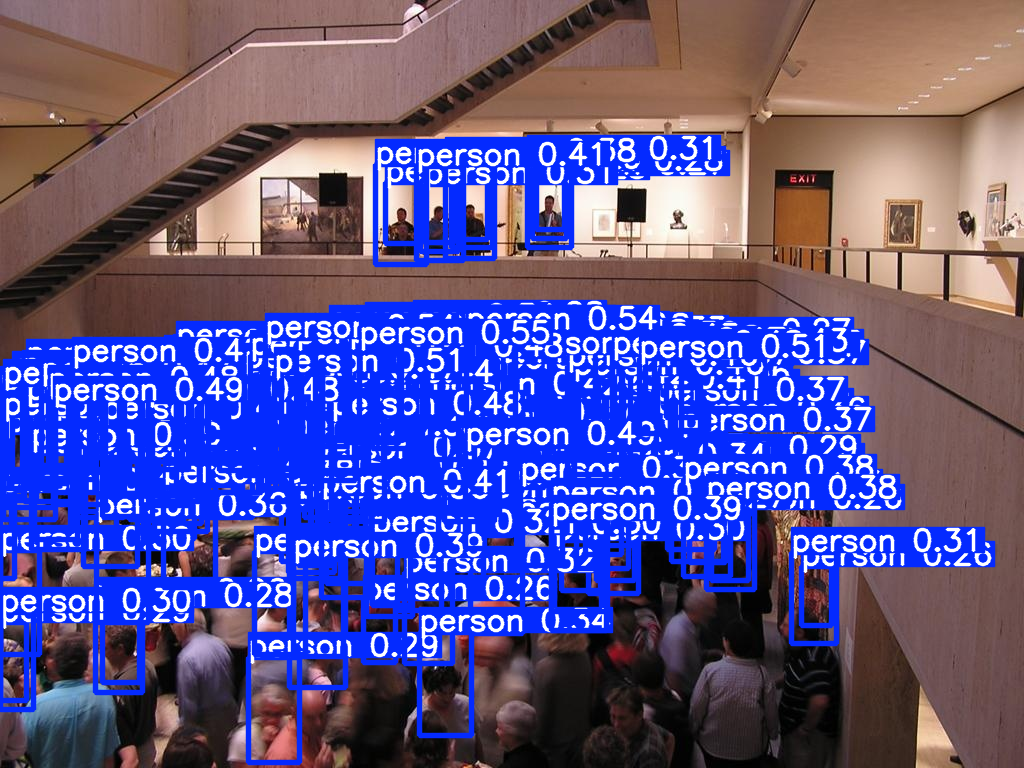

In [1]:
import cv2
from ultralytics import YOLO

# Load model hasil training
model_path = '/content/runs/detect/yolov8-shanghaitech/weights/best.pt'
model = YOLO(model_path)

# Path gambar tunggal
image_path = "/content/yolo_dataset/images/val/IMG_102.jpg"  # Ganti dengan nama file kamu

# Fungsi klasifikasi
def classify_crowd(count):
    if count > 50:
        return "Padat"
    elif count > 20:
        return "Semi Padat"
    else:
        return "Sepi"

# Baca dan prediksi gambar
img = cv2.imread(image_path)
if img is None:
    print(f"❌ Gambar tidak ditemukan: {image_path}")
else:
    results = model(image_path)
    num_people = len(results[0].boxes)
    crowd_status = classify_crowd(num_people)

    print(f"\n🖼️ Gambar: {image_path}")
    print(f"👥 Jumlah manusia terdeteksi: {num_people}")
    print(f"📌 Klasifikasi keramaian: {crowd_status}")

    # Visualisasi hasil di Google Colab
    results[0].show()  # Untuk desktop
    results[0].save(filename="result.jpg")  # Untuk disimpan jika ingin ditampilkan di Colab
